In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading train and test data

In [2]:
train=pd.read_csv('titanic/train.csv')
test= pd.read_csv('titanic/test.csv')

In [3]:
# concatenate the two sets to process data equally
all_titanic= pd.concat([train,test], sort=False)

### Exploring data set for insights

In [4]:
all_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
all_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
all_titanic['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [7]:
all_titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [8]:
all_titanic['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [9]:
all_titanic['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [10]:
all_titanic['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

### Transforming 'Cabin' and 'Embarqued' into one character categories (one additional for NAN='n')

In [11]:
all_titanic['Cabin']=all_titanic['Cabin'].apply(lambda x: (str(x))[0])
all_titanic['Embarked']=all_titanic['Embarked'].apply(lambda x: (str(x))[0])
all_titanic=all_titanic.drop('Ticket',axis=1)
all_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


## Describe data

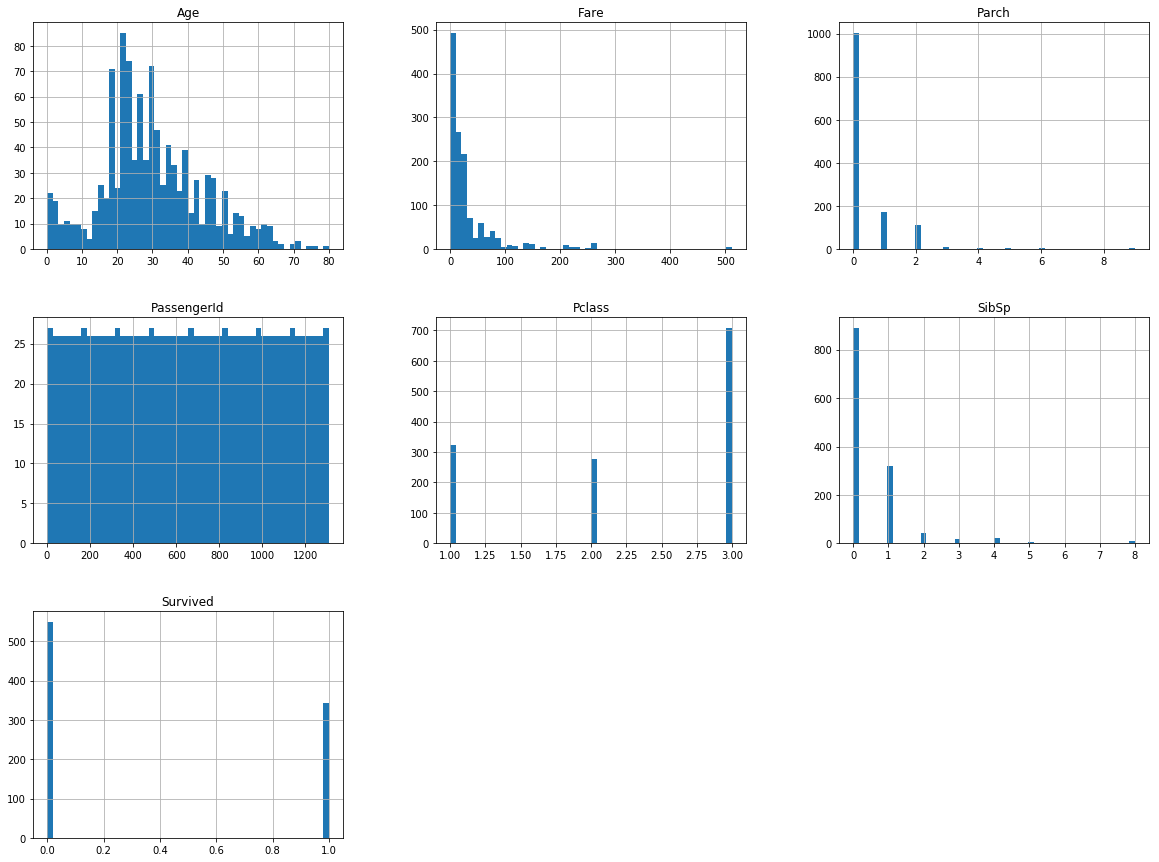

In [12]:
all_titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
# proportions of values male/female, fare categories, ticket categories, percentage of cabins

## Look for correlations

In [14]:
corr_matrix=all_titanic.corr()

In [15]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe81fcdf1d0>,
      dtype=object)

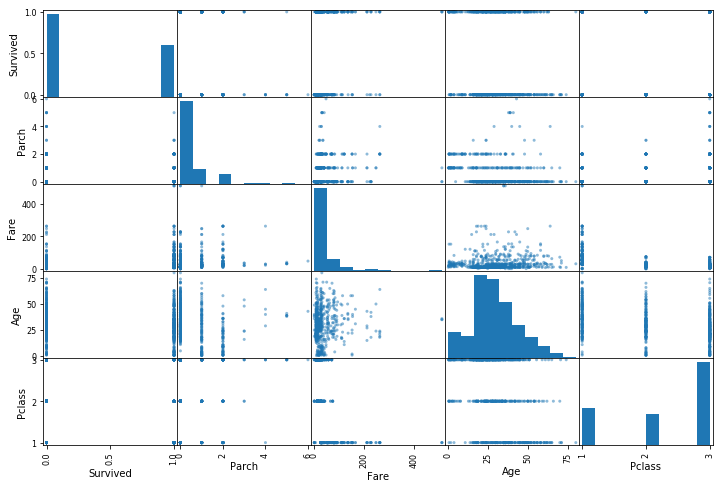

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Parch", "Fare", "Age", 'Pclass']
scatter_matrix(train[attributes], figsize=(12, 8))

## First try correlation one-way anova

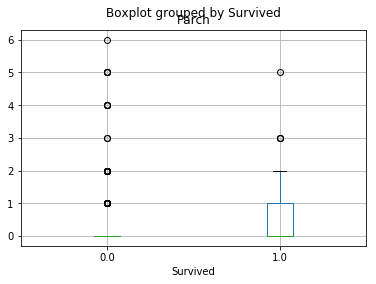

In [17]:
from scipy import stats
# F,p=stats.f_oneway(strat_train_set[''])
all_titanic.boxplot("Parch", by ='Survived')

In [18]:
# Try chi square to find correlations

## Transform categorical values

In [19]:
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Cabin'],prefix='cab',drop_first=True)],axis=1)
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Sex'],prefix='sex',drop_first=True)],axis=1)
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Pclass'],prefix='class',drop_first=True)],axis=1)
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Embarked'],prefix='emb',drop_first=True)],axis=1)

In [20]:
all_titanic.drop(['Cabin','Sex','Pclass','Embarked'],axis=1,inplace=True)

In [21]:
all_titanic['Age'].fillna(all_titanic['Age'].median(), inplace=True)
all_titanic['Fare'].fillna(all_titanic['Fare'].median(),inplace=True)

In [22]:
# all_titanic.info()

In [23]:
titanic_train=all_titanic.iloc[0:891]
titanic_unseen=all_titanic.iloc[891:]

In [24]:
titanic_train=titanic_train.drop(['Name','PassengerId'],axis=1)

In [25]:
titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_n,sex_male,class_2,class_3,emb_Q,emb_S,emb_n
0,0.0,22.0,1,0,7.2500,0,0,0,0,0,0,0,1,1,0,1,0,1,0
1,1.0,38.0,1,0,71.2833,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,0,0,0,0,0,1,1,0,1,0,1,0


## Divide train and test sets

Stratified split to keep passenger sex in the same proportion

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic_train, titanic_train['sex_male']):
    strat_titanic_train=titanic_train.loc[train_index]
    strat_titanic_test=titanic_train.loc[test_index]

In [27]:
print(len(strat_titanic_train), "train +", len(strat_titanic_test), "test")

712 train + 179 test


In [28]:
titanic_train['sex_male'].value_counts()/len(titanic_train)

1    0.647587
0    0.352413
Name: sex_male, dtype: float64

In [45]:
strat_titanic_train['sex_male'].value_counts()/len(strat_titanic_train)

1    0.647472
0    0.352528
Name: sex_male, dtype: float64

In [30]:
strat_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_n,sex_male,class_2,class_3,emb_Q,emb_S,emb_n
788,1.0,1.0,1,2,20.5750,0,0,0,0,0,0,0,1,1,0,1,0,1,0
347,1.0,28.0,1,0,16.1000,0,0,0,0,0,0,0,1,0,0,1,0,1,0
629,0.0,28.0,0,0,7.7333,0,0,0,0,0,0,0,1,1,0,1,1,0,0
734,0.0,23.0,0,0,13.0000,0,0,0,0,0,0,0,1,1,1,0,0,1,0
106,1.0,21.0,0,0,7.6500,0,0,0,0,0,0,0,1,0,0,1,0,1,0


## Preparing the data for ML algorithms

Divide data and data labels sets. Transform dataframe to numpy array. 

In [31]:
train = strat_titanic_train.drop("Survived", axis=1) 
train_labels= strat_titanic_train["Survived"].copy()

In [32]:
train.shape

(712, 18)

In [33]:
trainX=train.values
train_labelsY=train_labels.values

Prepare the test data (future use)

In [34]:
test = strat_titanic_test.drop("Survived", axis=1) 
test_labels= strat_titanic_test["Survived"].copy()

In [35]:
testX=test.values
test_labelsY=test_labels.values

## Select and train a model

In [68]:
import sklearn.metrics as metrics

### 1. SGDClassifier

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

sgd=SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd.fit(trainX,train_labelsY)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
cross_val_score(sgd, trainX, train_labelsY, cv=3, scoring="accuracy")

array([0.66386555, 0.66244726, 0.39240506])

In [38]:
y_train_pred = cross_val_predict(sgd, trainX, train_labelsY, cv=3)

In [39]:


metrics.precision_score(train_labelsY, y_train_pred)

0.4669926650366748

In [40]:
metrics.recall_score(train_labelsY, y_train_pred)

0.6895306859205776

### 2. Decision Tree classifier

In [41]:
 from sklearn.tree import DecisionTreeClassifier

In [46]:
tree_mdl=DecisionTreeClassifier(random_state=42)
tree_mdl.fit(trainX,train_labelsY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [43]:
cross_val_score(tree_mdl, trainX, train_labelsY, cv=3)

array([0.76890756, 0.73417722, 0.76793249])

In [50]:
print(sorted(zip(map(lambda x: round(x, 4), tree_mdl.feature_importances_), train), reverse=True)  )

[(0.3143, 'sex_male'), (0.2372, 'Fare'), (0.2116, 'Age'), (0.0641, 'class_3'), (0.0489, 'SibSp'), (0.0366, 'cab_n'), (0.0215, 'Parch'), (0.0147, 'emb_S'), (0.0118, 'emb_Q'), (0.0118, 'cab_E'), (0.0107, 'class_2'), (0.0074, 'cab_B'), (0.0041, 'cab_D'), (0.0031, 'cab_F'), (0.0022, 'cab_C'), (0.0, 'emb_n'), (0.0, 'cab_T'), (0.0, 'cab_G')]


### 3. Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,max_depth=2,random_state=42)
rf_mdl=rf.fit(trainX,train_labelsY)
rf_mdl.score(trainX,train_labelsY)

0.797752808988764

In [97]:
predictions = pd.DataFrame(rf_mdl.predict(testX))
probs = pd.DataFrame(rf_mdl.predict_proba(testX))

In [98]:
rf_accuracy = metrics.accuracy_score(test_labelsY, predictions)  
rf_roc_auc = metrics.roc_auc_score(test_labelsY, probs[1])  
rff1=metrics.f1_score(test_labelsY, predictions)

In [99]:
rf_cv_scores = cross_val_score(rf, testX, test_labelsY, scoring='precision', cv=3) 
print(rf_cv_scores)

[0.82352941 1.         0.75      ]


In [103]:
rf_recall=metrics.recall_score(test_labelsY,predictions, pos_label=1)

In [102]:
rf_precision=metrics.precision_score(test_labelsY,predictions, pos_label=1)

### 4. KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh_mdl=neigh.fit(trainX, train_labelsY) 

In [95]:
predictions = pd.DataFrame(neigh_mdl.predict(testX))  
probs=pd.DataFrame(neigh_mdl.predict_proba(testX))

In [ ]:
knn_accuracy = metrics.accuracy_score(test_labelsY, predictions)  
knn_roc_auc = metrics.roc_auc_score(test_labelsY, probs[1])  
knnf1= metrics.f1_score(test_labelsY, predictions)  